# Explore SSTa

In [1]:
%matplotlib notebook

In [2]:
# imports
import numpy as np
import pandas

from matplotlib import pyplot as plt
import seaborn as sns

import results

# Load

In [3]:
evals_tbl = results.load_log_prob('std')

Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2003_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2004_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2005_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2006_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2007_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2008_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2009_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evaluations/R2010_on_2010_95clear_128x128_preproc_std_log_prob.csv
Loading: /home/xavier/Projects/Oceanography/AI/OOD/Evalu

In [4]:
len(evals_tbl)

12358049

## Add $\Delta T$

In [24]:
evals_tbl['DT'] = evals_tbl.T90 - evals_tbl.T10

# Cut 

In [5]:
point1 = int(0.001 * len(evals_tbl))
point1

12358

In [6]:
isortLL = np.argsort(evals_tbl.log_likelihood)

## Outliers

In [7]:
outliers = evals_tbl.iloc[isortLL[0:point1]]

In [8]:
outliers.head()

,filename,row,column,latitude,longitude,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,log_likelihood,date
251303,AQUA_MODIS.20030120T072506.L2.SST.nc,702,912,31.563154,-80.14284,0.049561,16.073589,7.755000,25.754999,23.984999,10.250000,-10710.192,2003-01-20 07:25:00
149513,AQUA_MODIS.20030120T072506.L2.SST.nc,688,933,31.641838,-79.83001,0.048035,17.756395,7.490000,25.674999,24.660000,11.280000,-10532.818,2003-01-20 07:25:00
473631,AQUA_MODIS.20100228T070500.L2.SST.nc,1093,389,31.535467,-79.97866,0.049683,15.890407,9.090000,24.064999,23.355000,10.675000,-10450.174,2010-02-28 07:05:00
193933,AQUA_MODIS.20030202T065506.L2.SST.nc,434,261,31.131145,-80.18164,0.049927,17.519562,9.165000,25.209999,24.625000,10.684999,-10423.749,2003-02-02 06:55:00
350230,AQUA_MODIS.20070207T073507.L2.SST.nc,516,1016,30.761227,-80.42854,0.049805,19.382481,10.559999,26.750000,25.760000,12.850216,-10317.767,2007-02-07 07:35:00


In [12]:
outliers['flavor'] = 'outlier'

/home/xavier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
outliers.head()

,filename,row,column,latitude,longitude,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,log_likelihood,date,flavor
251303,AQUA_MODIS.20030120T072506.L2.SST.nc,702,912,31.563154,-80.14284,0.049561,16.073589,7.755000,25.754999,23.984999,10.250000,-10710.192,2003-01-20 07:25:00,outlier
149513,AQUA_MODIS.20030120T072506.L2.SST.nc,688,933,31.641838,-79.83001,0.048035,17.756395,7.490000,25.674999,24.660000,11.280000,-10532.818,2003-01-20 07:25:00,outlier
473631,AQUA_MODIS.20100228T070500.L2.SST.nc,1093,389,31.535467,-79.97866,0.049683,15.890407,9.090000,24.064999,23.355000,10.675000,-10450.174,2010-02-28 07:05:00,outlier
193933,AQUA_MODIS.20030202T065506.L2.SST.nc,434,261,31.131145,-80.18164,0.049927,17.519562,9.165000,25.209999,24.625000,10.684999,-10423.749,2003-02-02 06:55:00,outlier
350230,AQUA_MODIS.20070207T073507.L2.SST.nc,516,1016,30.761227,-80.42854,0.049805,19.382481,10.559999,26.750000,25.760000,12.850216,-10317.767,2007-02-07 07:35:00,outlier


## Inliers

In [9]:
inliers = evals_tbl.iloc[isortLL[-point1:]]

In [10]:
inliers.head()

,filename,row,column,latitude,longitude,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,log_likelihood,date
87635,AQUA_MODIS.20190314T041001.L2.SST.nc,656,741,12.177675,-35.980810,0.000916,24.284340,23.230000,25.045000,24.519999,24.074999,811.94260,2019-03-14 04:10:00
571169,AQUA_MODIS.20151124T013510.L2.SST.nc,496,325,-8.131133,-4.257486,0.000000,23.498306,22.885000,24.125000,23.705000,23.299999,811.94653,2015-11-24 01:35:00
281035,AQUA_MODIS.20190315T031501.L2.SST.nc,560,677,10.855741,-22.983524,0.000000,23.912252,23.445000,24.600000,24.139999,23.705000,811.94916,2019-03-15 03:15:00
450067,AQUA_MODIS.20171208T094001.L2.SST.nc,1360,709,-4.390188,-121.745220,0.000061,24.890907,23.840000,25.439999,25.074999,24.699999,811.94970,2017-12-08 09:40:00
617839,AQUA_MODIS.20131229T094009.L2.SST.nc,1136,229,0.697366,-125.671660,0.000000,23.866840,23.234999,24.535000,24.105000,23.639999,811.95360,2013-12-29 09:40:00


In [14]:
inliers['flavor'] = 'inlier'

/home/xavier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Combine for convenience

In [18]:
extrema = pandas.concat([outliers, inliers])

In [19]:
extrema.head()

,filename,row,column,latitude,longitude,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,log_likelihood,date,flavor
251303,AQUA_MODIS.20030120T072506.L2.SST.nc,702,912,31.563154,-80.14284,0.049561,16.073589,7.755000,25.754999,23.984999,10.250000,-10710.192,2003-01-20 07:25:00,outlier
149513,AQUA_MODIS.20030120T072506.L2.SST.nc,688,933,31.641838,-79.83001,0.048035,17.756395,7.490000,25.674999,24.660000,11.280000,-10532.818,2003-01-20 07:25:00,outlier
473631,AQUA_MODIS.20100228T070500.L2.SST.nc,1093,389,31.535467,-79.97866,0.049683,15.890407,9.090000,24.064999,23.355000,10.675000,-10450.174,2010-02-28 07:05:00,outlier
193933,AQUA_MODIS.20030202T065506.L2.SST.nc,434,261,31.131145,-80.18164,0.049927,17.519562,9.165000,25.209999,24.625000,10.684999,-10423.749,2003-02-02 06:55:00,outlier
350230,AQUA_MODIS.20070207T073507.L2.SST.nc,516,1016,30.761227,-80.42854,0.049805,19.382481,10.559999,26.750000,25.760000,12.850216,-10317.767,2007-02-07 07:35:00,outlier


# $<$SST$>$

<IPython.core.display.Javascript object>


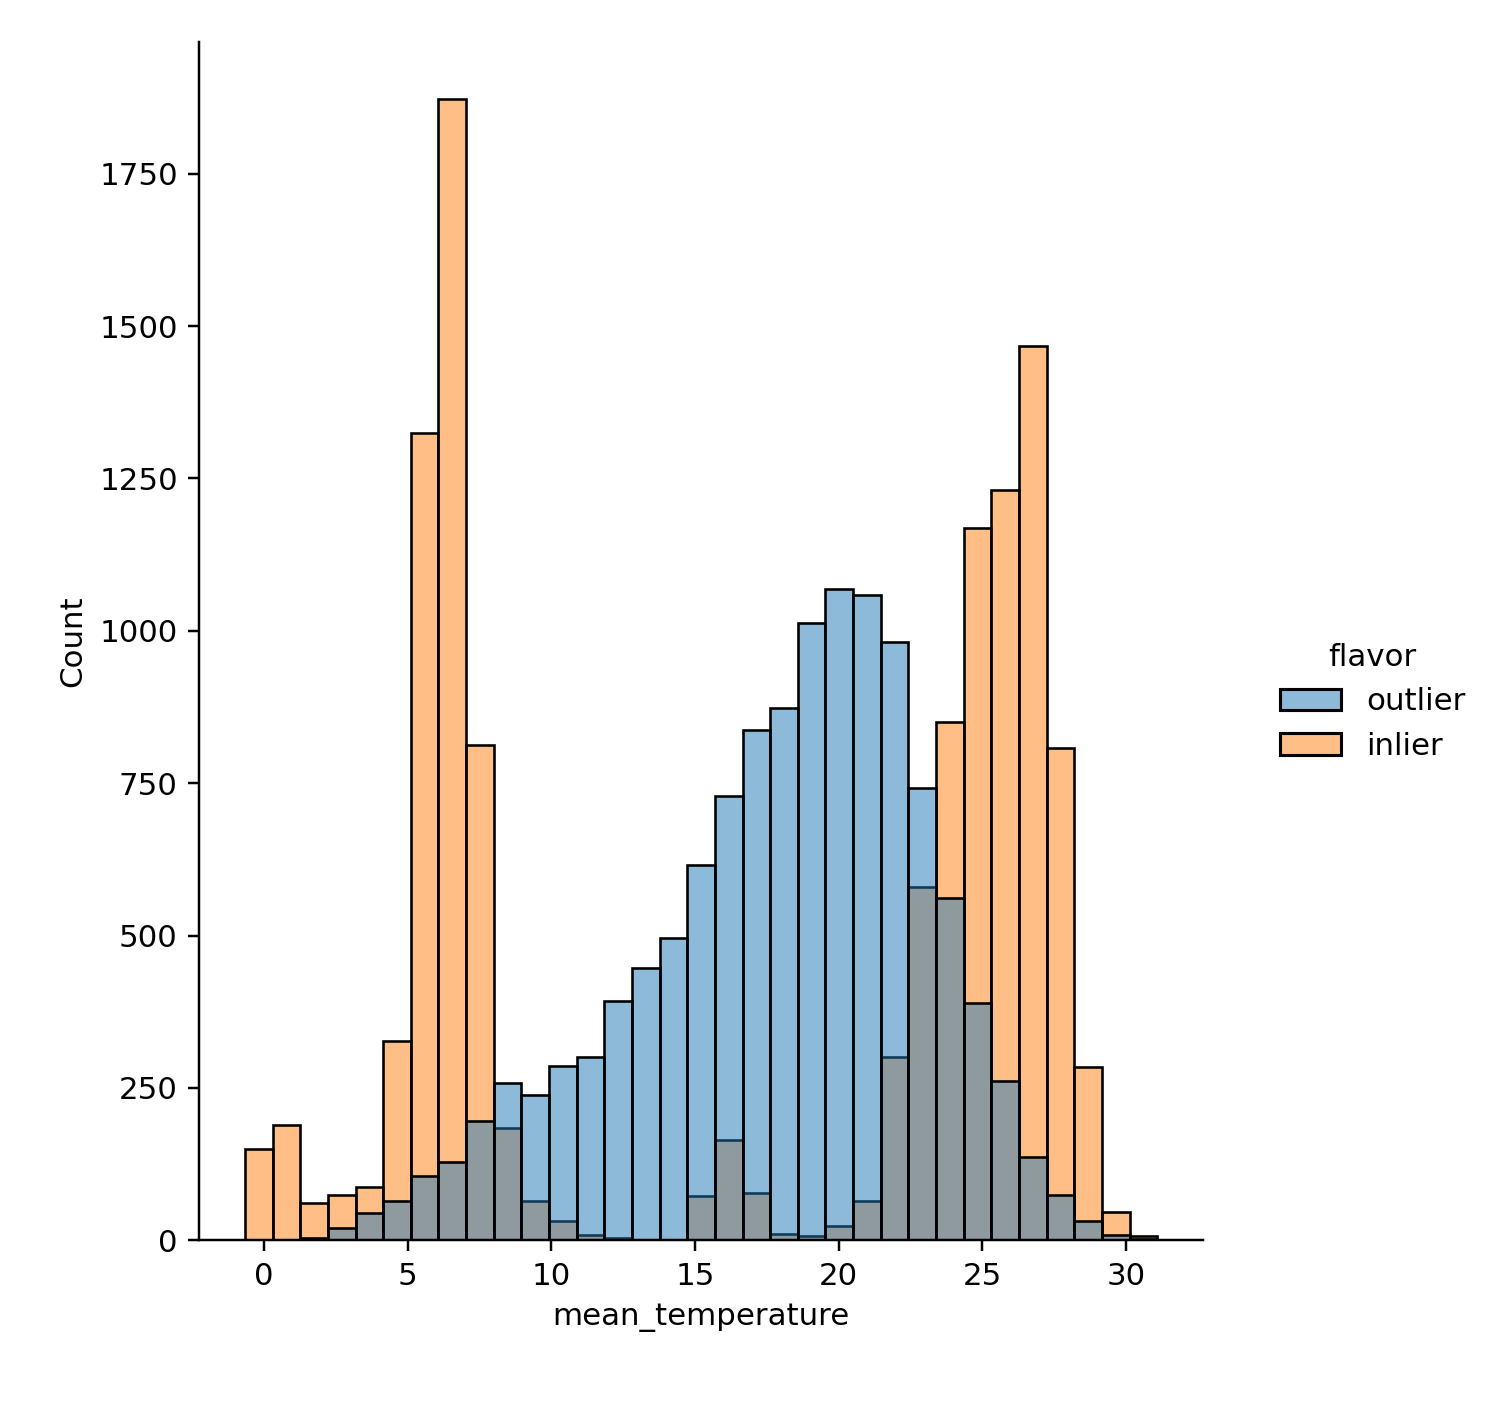

In [21]:
_ = sns.displot(extrema, x='mean_temperature', hue='flavor')

# $\Delta T$

## Extrema

<IPython.core.display.Javascript object>


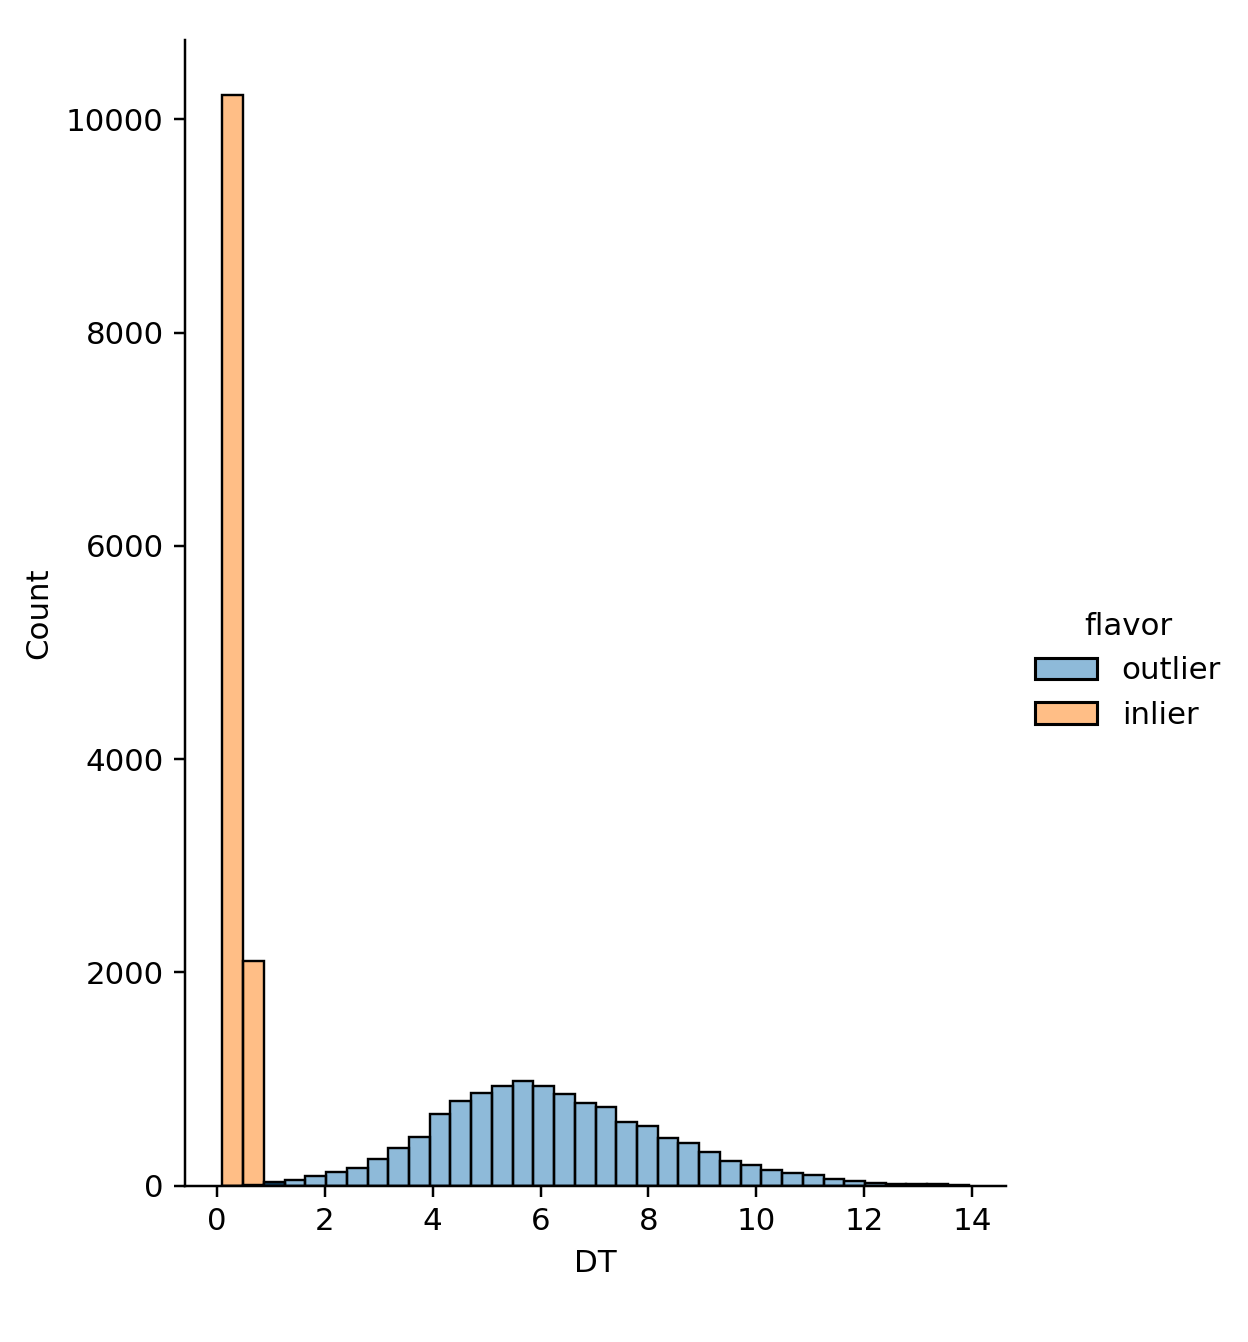

In [23]:
_ = sns.displot(extrema, x='DT', hue='flavor')

## Full sample

In [25]:
evals_tbl.keys()

Index(['filename', 'row', 'column', 'latitude', 'longitude', 'clear_fraction',
       'mean_temperature', 'Tmin', 'Tmax', 'T90', 'T10', 'log_likelihood',
       'date', 'DT'],
      dtype='object')

<IPython.core.display.Javascript object>


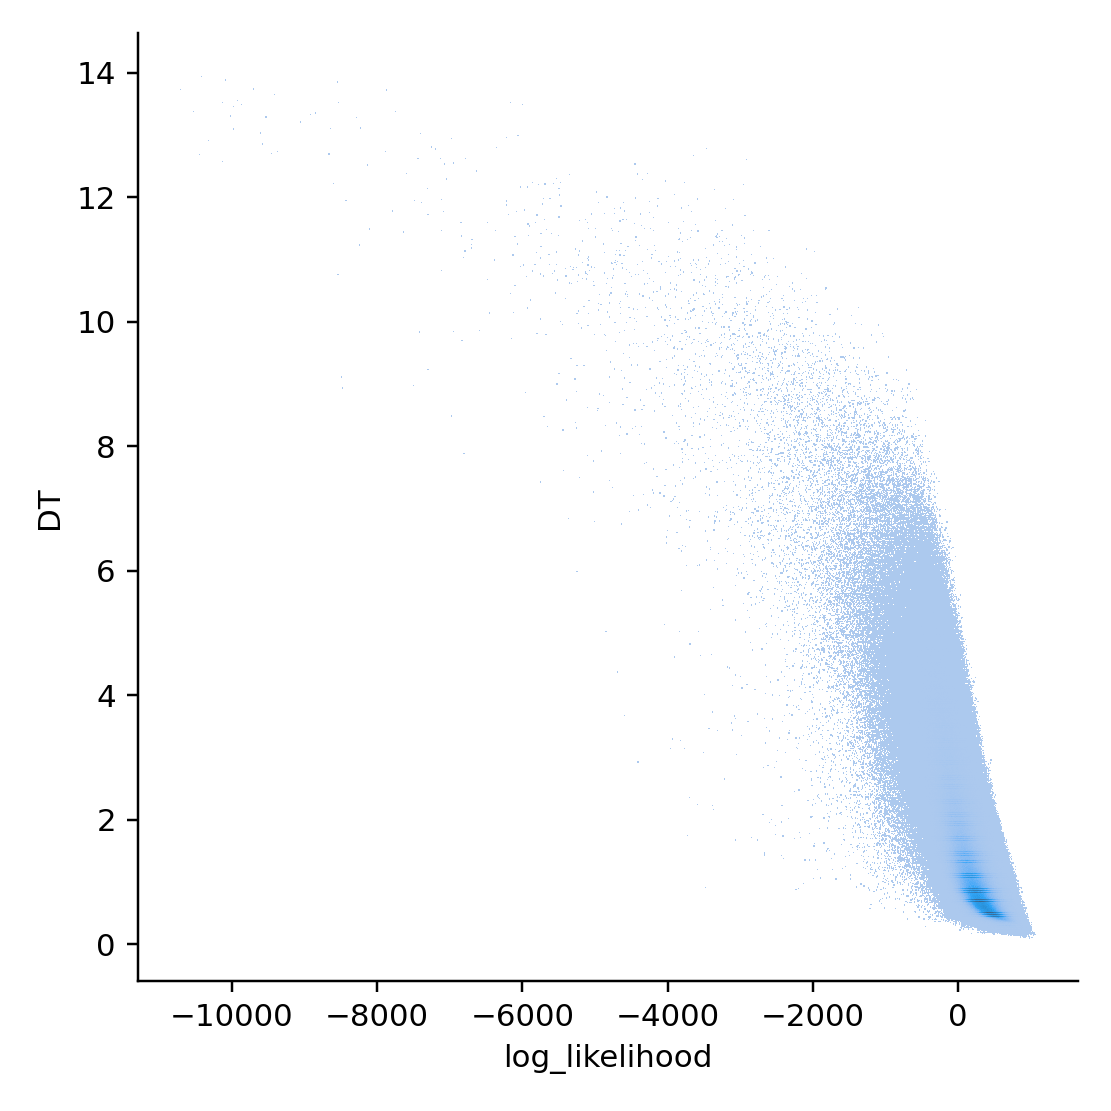

In [37]:
_ = sns.displot(evals_tbl, x='log_likelihood', y='DT')#, kind='kde')

# Date

<IPython.core.display.Javascript object>


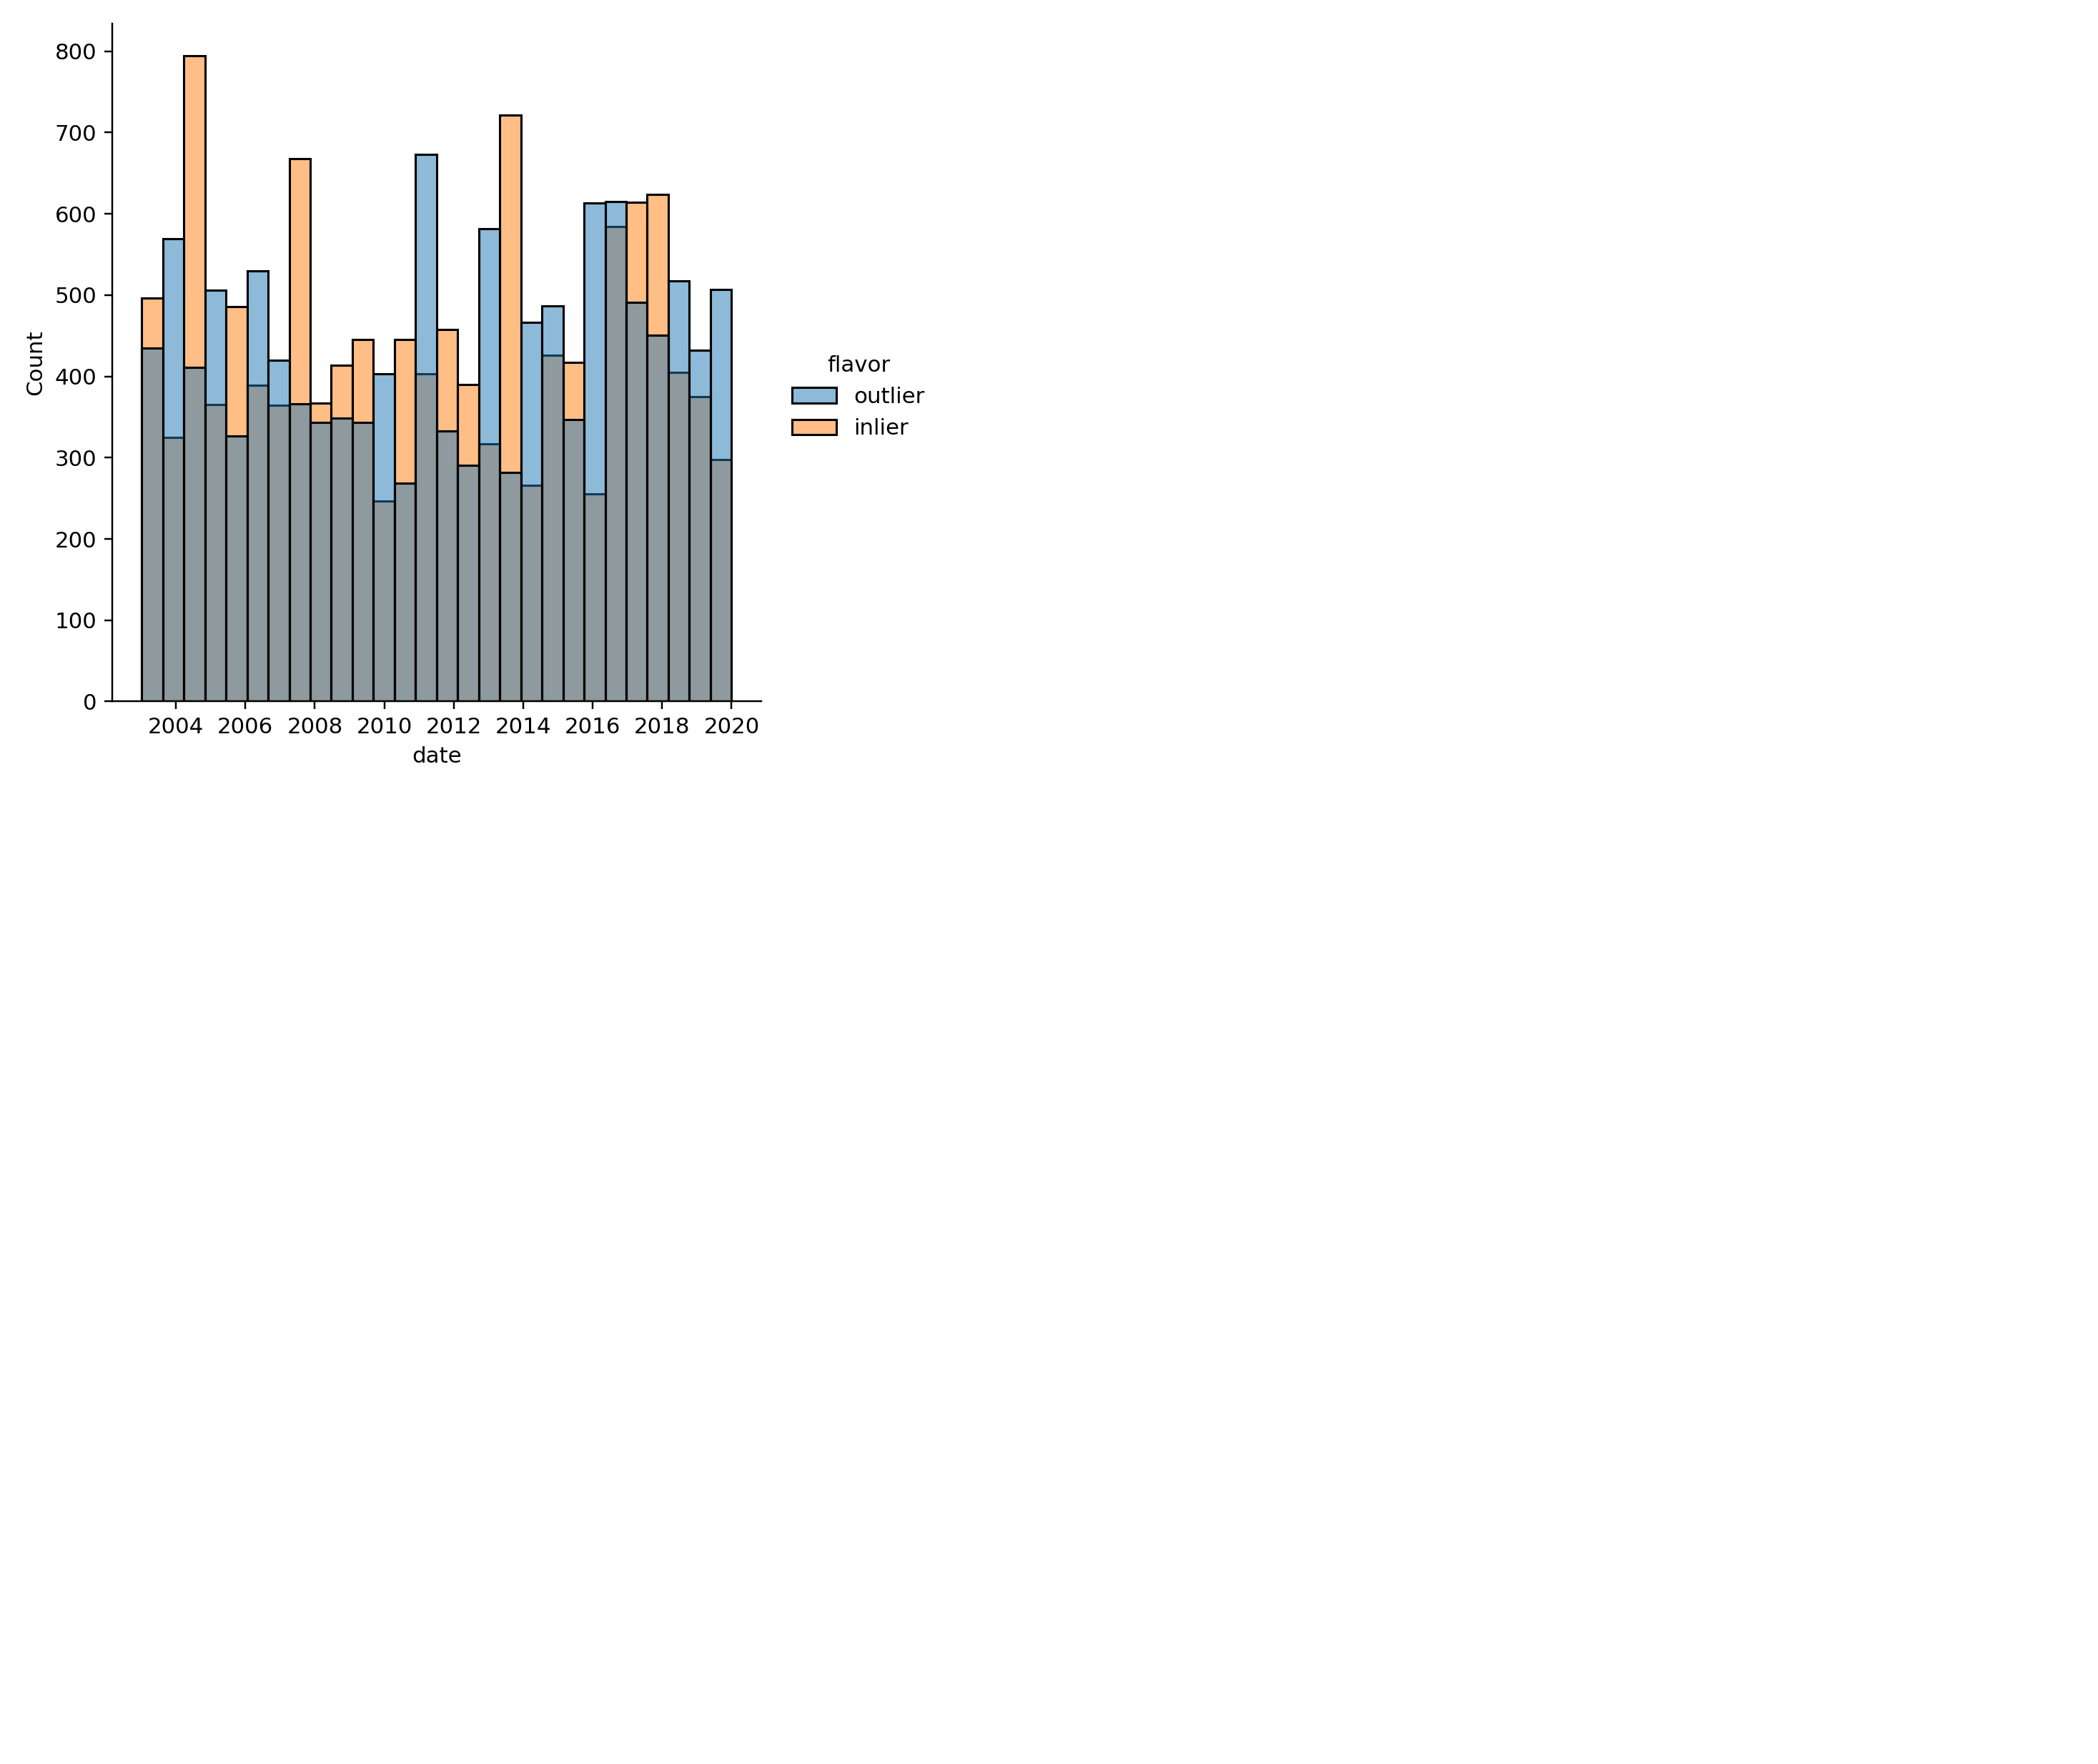

In [34]:
_ = sns.displot(extrema, x='date', hue='flavor')#, figsize=(8,5))

# Cloud Coverage

<IPython.core.display.Javascript object>


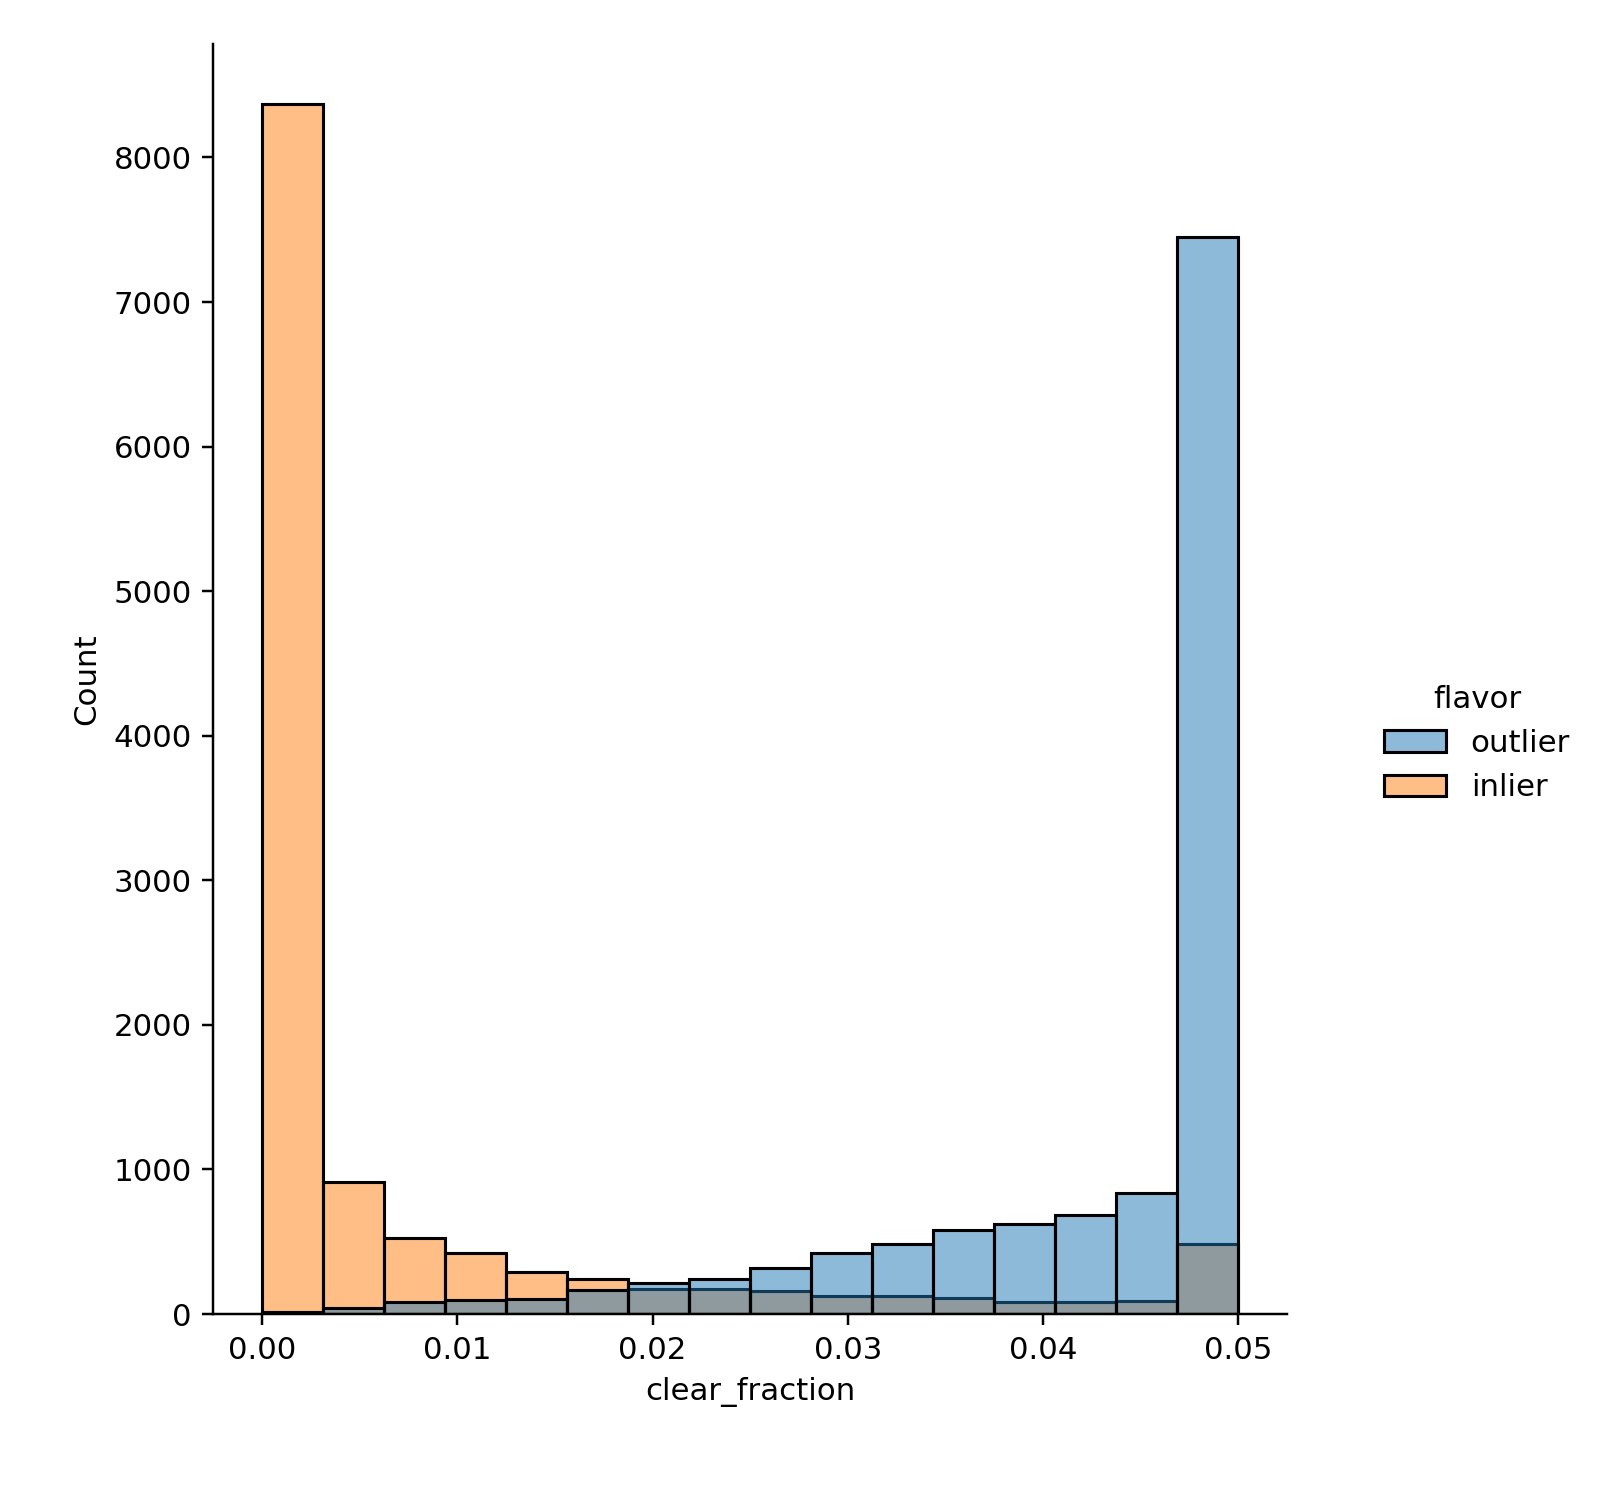

In [38]:
_ = sns.displot(extrema, x='clear_fraction', hue='flavor')#, figsize=(8,5))

## Full table

In [43]:
evals_tbl['flavor'] = 'normal'
evals_tbl['flavor'].values[isortLL[0:point1]] = 'outlier'
evals_tbl['flavor'].values[isortLL[-point1:]] = 'inlier'

<IPython.core.display.Javascript object>


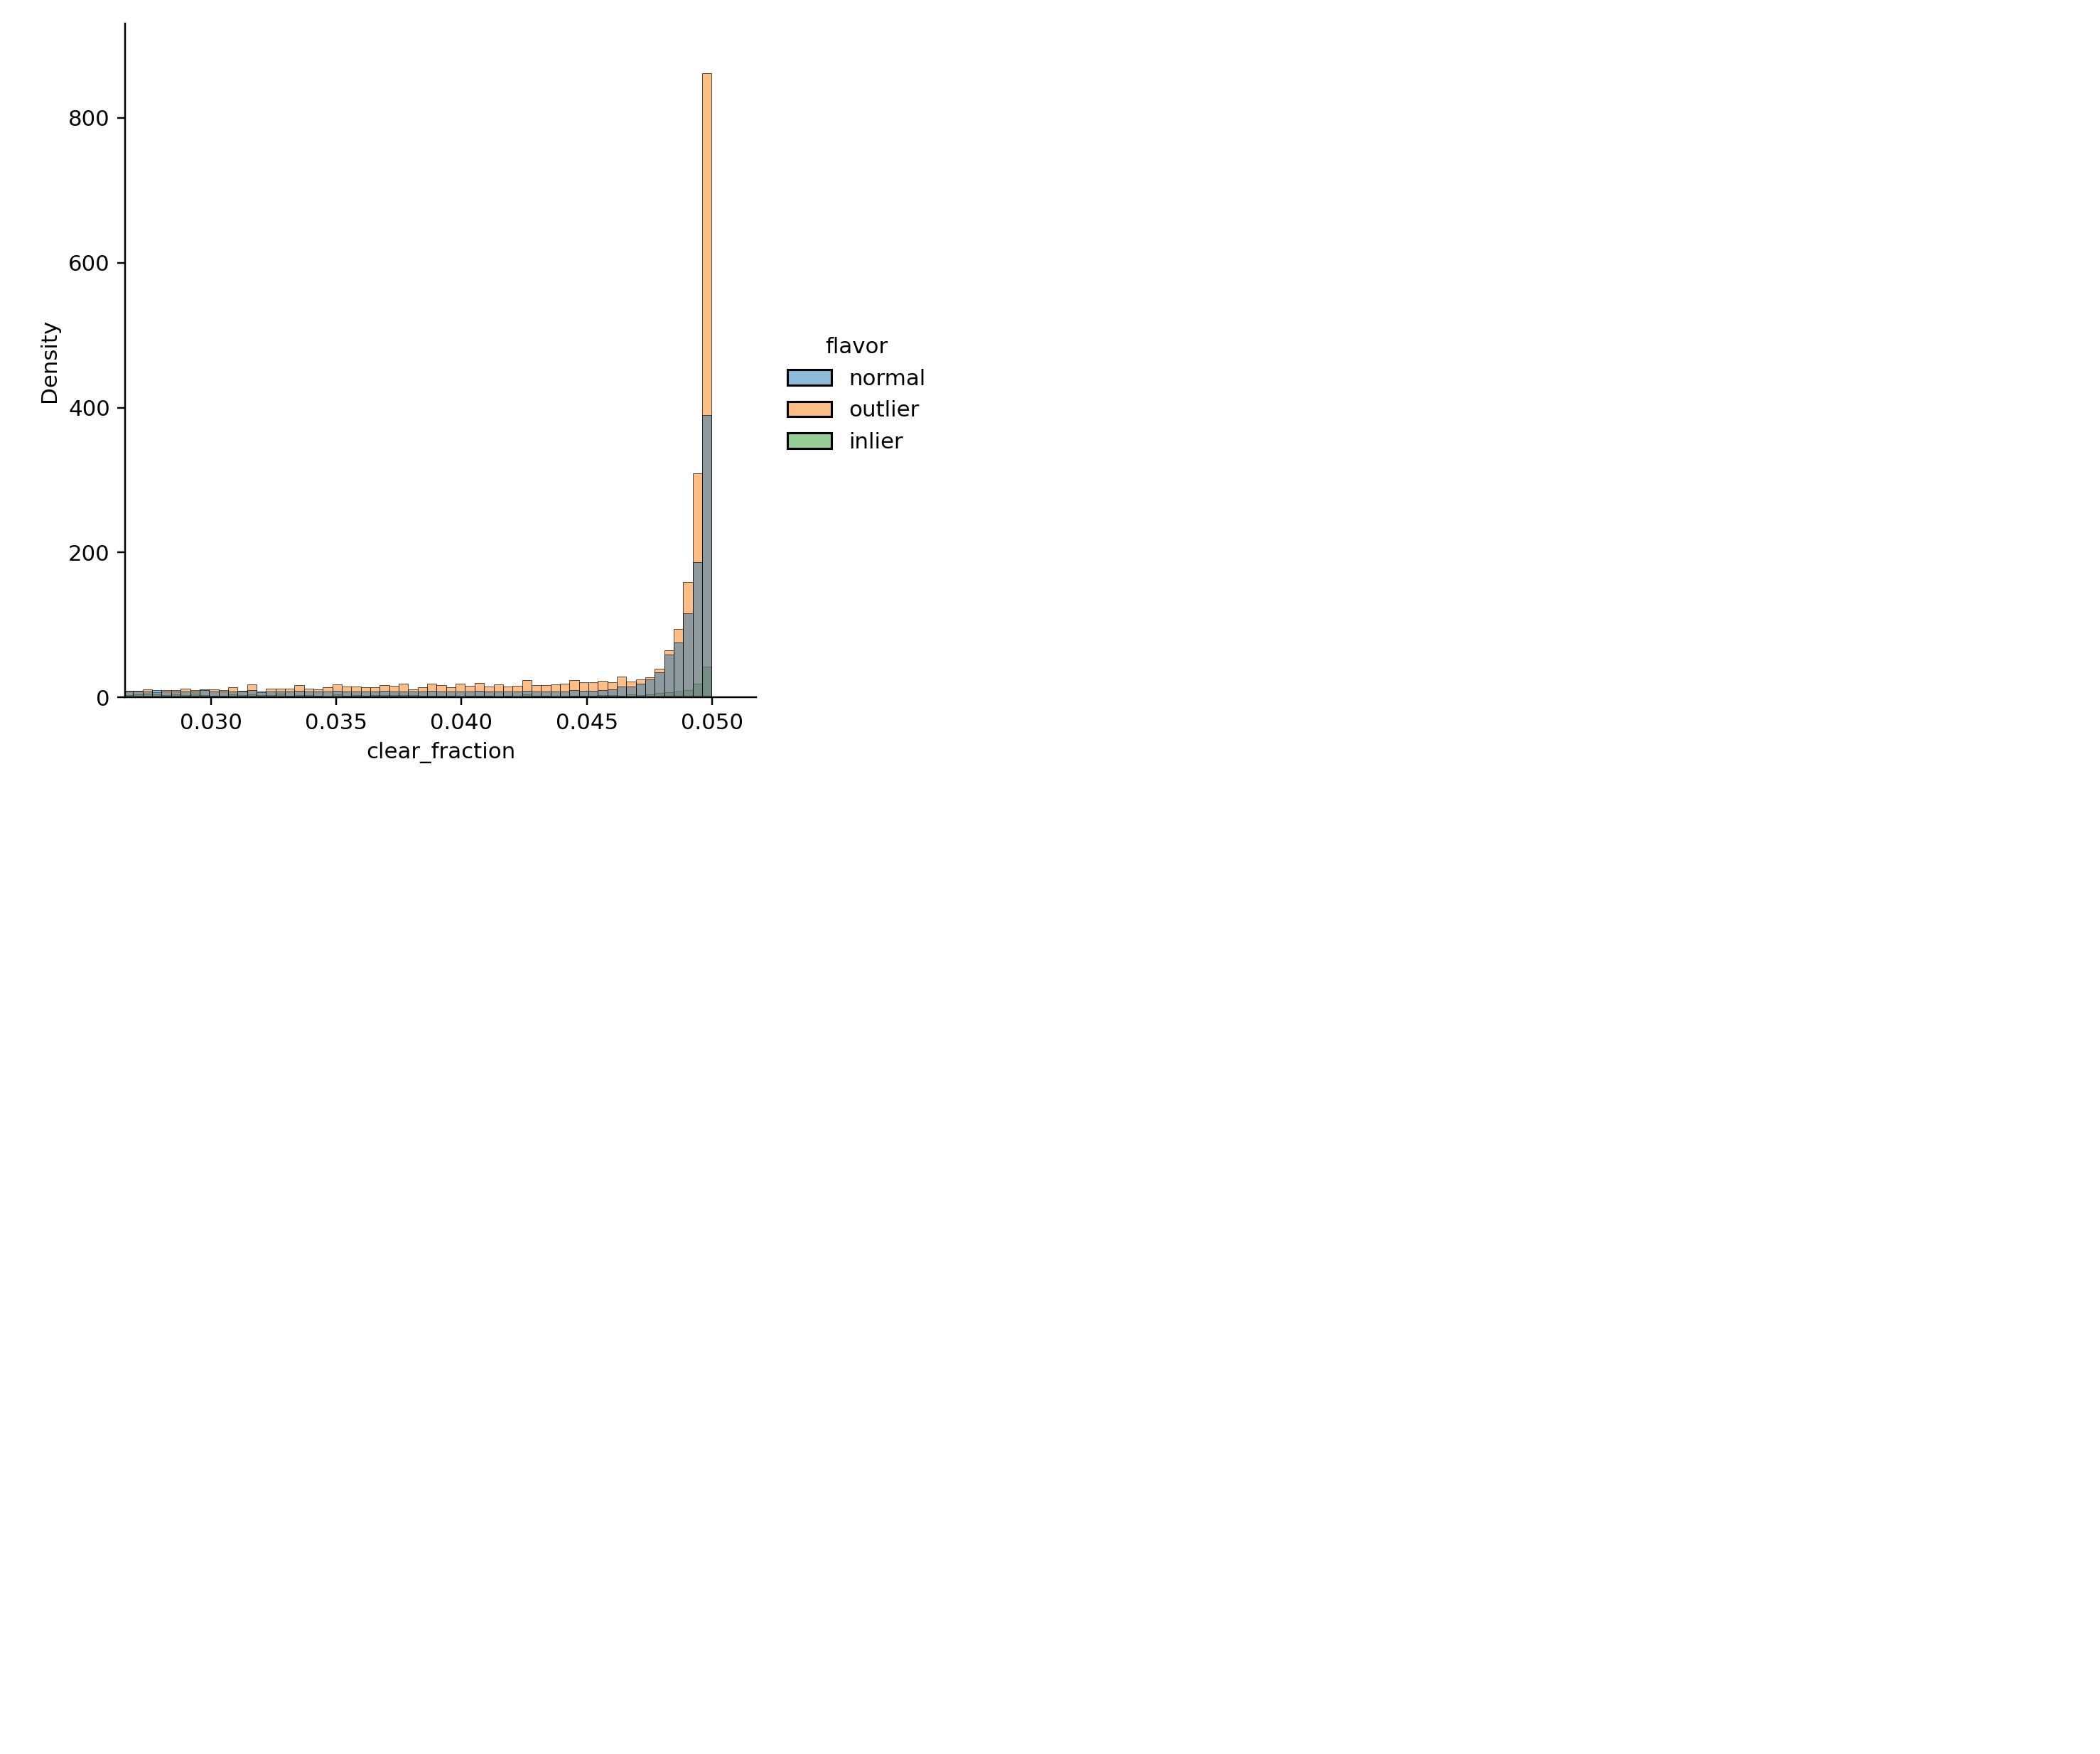

In [46]:
_ = sns.displot(evals_tbl, x='clear_fraction', hue='flavor', stat="density", common_norm=False)

In [49]:
np.arange(2003, 2020, 2)

array([2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])